In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Housing.csv


In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/kaggle/input/housing-dataset/Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
# converting the catgeo columns yes and no to 1 and 0

In [7]:
df['mainroad']= df['mainroad'].map({'yes':1,'no':0})
df['guestroom']= df['guestroom'].map({'yes':1,'no':0})
df['basement']= df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']= df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']= df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']= df['prefarea'].map({'yes':1,'no':0})

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [9]:
# using the getdummies function to furnishingstatus

In [10]:
status = pd.get_dummies(df['furnishingstatus'],drop_first=True)
                        

In [11]:
df = pd.concat([df,status],axis=1)

In [12]:
df.drop(['furnishingstatus'], axis=1, inplace=True)


In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [14]:
#creating some new colume
df['areaperbedroom'] = df['area']/df['bedrooms']
df['bbration']= df['bathrooms']/df['bedrooms']

In [15]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbration
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.000000,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.000000,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.000000,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.000000,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1,1500.000000,0.500000
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,800.000000,0.333333
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1,1810.000000,0.500000
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,970.000000,0.333333


In [16]:
# normalising the data

In [17]:
def normalize(x):
    return((x-np.min(x))/max(x)-min(x))

In [18]:
df = df.apply(normalize)

In [19]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbration
0,-1.749999e+06,-1649.643827,-0.500000,-0.75,-0.50,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,-380.776667,0.166667
1,-1.749999e+06,-1649.548765,-0.500000,-0.25,-0.25,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,-380.718333,0.666667
2,-1.749999e+06,-1649.487037,-0.666667,-0.75,-0.75,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,-380.554697,0.333333
3,-1.749999e+06,-1649.638889,-0.500000,-0.75,-0.75,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,-380.773636,0.166667
4,-1.749999e+06,-1649.643827,-0.500000,-1.00,-0.75,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,-380.776667,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.750000e+06,-1649.916667,-0.833333,-1.00,-1.00,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0,-380.830455,0.166667
541,-1.750000e+06,-1649.953704,-0.666667,-1.00,-1.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,-380.936515,0.000000
542,-1.750000e+06,-1649.878395,-0.833333,-1.00,-1.00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,-380.783485,0.166667
543,-1.750000e+06,-1649.922222,-0.666667,-1.00,-1.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-380.910758,0.000000


In [20]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbration'],
      dtype='object')

In [21]:
x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbration']]
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,test_size = 0.3,random_state=100)

In [24]:
import statsmodels.api as sm
x_train_sm = x_train
y_train

359   -1.750000e+06
19    -1.749999e+06
159   -1.750000e+06
35    -1.750000e+06
28    -1.750000e+06
           ...     
526   -1.750000e+06
53    -1.750000e+06
350   -1.750000e+06
79    -1.750000e+06
520   -1.750000e+06
Name: price, Length: 381, dtype: float64

In [25]:
x_train_sm = sm.add_constant(x_train_sm)
x_train_sm

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbration
359,1.0,-1649.879630,-0.666667,-1.00,-1.00,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,-380.875909,0.000000
19,1.0,-1649.705556,-0.666667,-0.75,-0.75,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,-380.733485,0.333333
159,1.0,-1649.907407,-0.666667,-0.75,-1.00,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,-380.898636,0.333333
35,1.0,-1649.669753,-0.666667,-0.75,-0.25,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,-380.704192,0.333333
28,1.0,-1649.611111,-0.333333,-0.75,-0.75,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,-380.816818,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,-1649.905556,-0.833333,-1.00,-1.00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,-380.816818,0.166667
53,1.0,-1649.783951,-0.666667,-0.75,-0.25,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0,-380.797626,0.333333
350,1.0,-1649.890741,-0.833333,-1.00,-0.75,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0,-380.798636,0.166667
79,1.0,-1649.731481,-0.666667,-0.75,-0.50,1.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,-380.754697,0.333333


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
rfe = RFE(lm,n_features_to_select = 9)

In [29]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [30]:
rfe = rfe.fit(x_train,y_train)

In [31]:
print(rfe.support_)

[ True False  True  True  True False False  True  True False  True False
 False  True  True]


In [32]:
print(rfe.ranking_)

[1 3 1 1 1 4 6 1 1 2 1 7 5 1 1]


In [33]:
col = x_train.columns[rfe.support_]

In [34]:
col

Index(['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating',
       'airconditioning', 'prefarea', 'areaperbedroom', 'bbration'],
      dtype='object')

In [35]:
x_train = x_train[col]

In [36]:
x_train

,area,bathrooms,stories,mainroad,hotwaterheating,airconditioning,prefarea,areaperbedroom,bbration
359,-1649.879630,-1.00,-1.00,1.0,0.0,0.0,0.0,-380.875909,0.000000
19,-1649.705556,-0.75,-0.75,1.0,0.0,1.0,1.0,-380.733485,0.333333
159,-1649.907407,-0.75,-1.00,1.0,0.0,1.0,0.0,-380.898636,0.333333
35,-1649.669753,-0.75,-0.25,1.0,0.0,1.0,0.0,-380.704192,0.333333
28,-1649.611111,-0.75,-0.75,1.0,1.0,0.0,0.0,-380.816818,0.066667
...,...,...,...,...,...,...,...,...,...
526,-1649.905556,-1.00,-1.00,1.0,0.0,0.0,0.0,-380.816818,0.166667
53,-1649.783951,-0.75,-0.25,1.0,0.0,1.0,0.0,-380.797626,0.333333
350,-1649.890741,-1.00,-0.75,1.0,1.0,0.0,0.0,-380.798636,0.166667
79,-1649.731481,-0.75,-0.50,1.0,0.0,1.0,0.0,-380.754697,0.333333


In [37]:
lm.fit(x_train,y_train)

LinearRegression()

In [38]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbration
265,-1649.924074,-0.666667,-1.00,-0.75,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,-380.912273,0.000000
54,-1649.731481,-0.666667,-0.75,-0.75,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,1.0,0.0,-380.754697,0.333333
171,-1649.467963,-0.666667,-1.00,-1.00,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.0,0.0,-380.539091,0.000000
244,-1649.773457,-0.666667,-1.00,-0.75,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.0,-380.789040,0.000000
268,-1649.796296,-0.500000,-1.00,-0.75,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,-380.870227,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-1649.981481,-0.666667,-0.75,-0.75,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,1.0,-380.959242,0.333333
191,-1649.441358,-0.666667,-1.00,-0.75,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,-380.517323,0.000000
310,-1649.732407,-0.666667,-1.00,-1.00,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,-380.755455,0.000000
46,-1649.731481,-0.666667,-0.75,-0.25,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,-380.754697,0.333333


In [39]:
x_test_sm = sm.add_constant(x_test)


In [40]:
x_test_sm

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbration
265,1.0,-1649.924074,-0.666667,-1.00,-0.75,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,-380.912273,0.000000
54,1.0,-1649.731481,-0.666667,-0.75,-0.75,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,1.0,0.0,-380.754697,0.333333
171,1.0,-1649.467963,-0.666667,-1.00,-1.00,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,1.0,0.0,-380.539091,0.000000
244,1.0,-1649.773457,-0.666667,-1.00,-0.75,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.0,-380.789040,0.000000
268,1.0,-1649.796296,-0.500000,-1.00,-0.75,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0,-380.870227,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,-1649.981481,-0.666667,-0.75,-0.75,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,1.0,-380.959242,0.333333
191,1.0,-1649.441358,-0.666667,-1.00,-0.75,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,-380.517323,0.000000
310,1.0,-1649.732407,-0.666667,-1.00,-1.00,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,-380.755455,0.000000
46,1.0,-1649.731481,-0.666667,-0.75,-0.25,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,0.0,-380.754697,0.333333


In [41]:
x_test_sm = x_test_sm[col]

In [42]:
x_test_sm

,area,bathrooms,stories,mainroad,hotwaterheating,airconditioning,prefarea,areaperbedroom,bbration
265,-1649.924074,-1.00,-0.75,1.0,0.0,0.0,1.0,-380.912273,0.000000
54,-1649.731481,-0.75,-0.75,1.0,0.0,1.0,0.0,-380.754697,0.333333
171,-1649.467963,-1.00,-1.00,1.0,0.0,0.0,1.0,-380.539091,0.000000
244,-1649.773457,-1.00,-0.75,1.0,0.0,0.0,1.0,-380.789040,0.000000
268,-1649.796296,-1.00,-0.75,1.0,0.0,1.0,0.0,-380.870227,-0.083333
...,...,...,...,...,...,...,...,...,...
413,-1649.981481,-0.75,-0.75,1.0,0.0,0.0,1.0,-380.959242,0.333333
191,-1649.441358,-1.00,-0.75,1.0,0.0,0.0,0.0,-380.517323,0.000000
310,-1649.732407,-1.00,-1.00,1.0,0.0,0.0,0.0,-380.755455,0.000000
46,-1649.731481,-0.75,-0.25,1.0,0.0,1.0,0.0,-380.754697,0.333333


In [43]:
y_predi = lm.predict(x_test_sm)
y_predi.shape

(164,)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test contains the actual target values and y_pred contains the predicted values
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predi)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predi)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_predi)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.07068692353872083
Mean Squared Error: 0.008829650390296746
Root Mean Squared Error: 0.09396621941047084
R-squared: 0.602172177485162


ValueError: x and y must be the same size

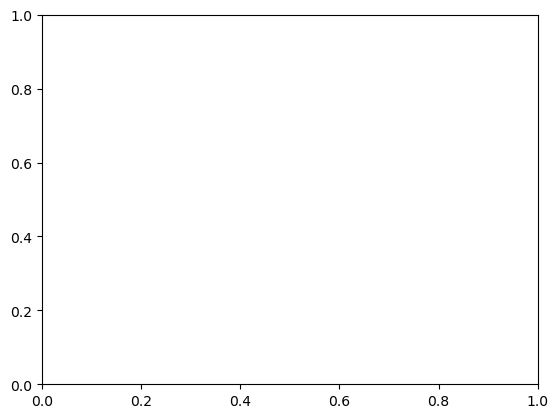

In [45]:
fig= plt.figure()
plt.scatter(x_train_sm,y_train,label='data')
plt.scatter(x_test_sm,y_predi,color='orange',label='prediction')
plt.ledend()
plt.show()